# Dealing with missing Values

In [12]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


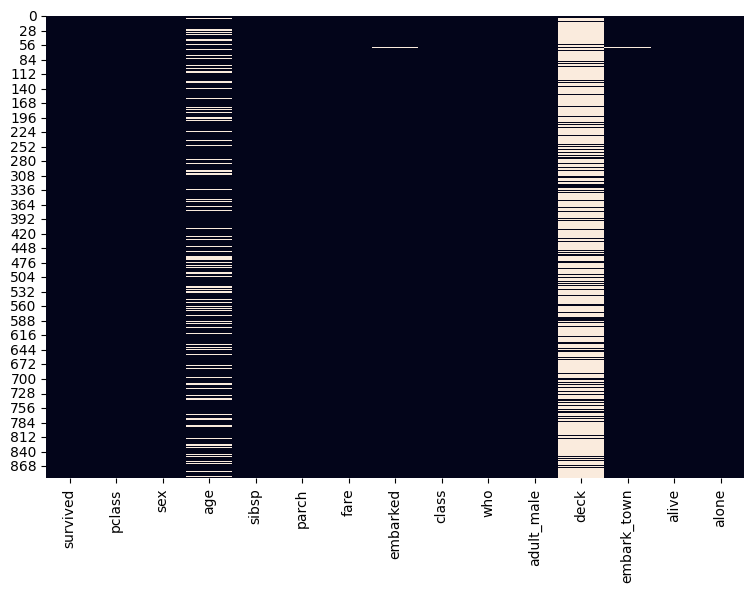

In [29]:
# visaulize the null values in the dataset
# Creating a new figure with a specific size (width=9 inches, height=6 inches)
plt.figure(figsize=(9, 6))

# Creating a heatmap to visualize missing values in a DataFrame (df)
# df.isnull() returns a DataFrame of the same shape as df, where True indicates missing values and False indicates non-missing values
# The 'cbar=False' argument disables the color bar on the side of the heatmap
sns.heatmap(df.isnull(), cbar=False)

# Displaying the heatmap
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [31]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
# df: This is assumed to be a DataFrame object, typically from a pandas library.
# .isnull(): This method checks for missing or NaN (Not a Number) values in the DataFrame.
# .sum(): This method calculates the sum of missing values for each column.
# .sort_values(ascending=False): This method sorts the sum of missing values in descending order.

df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [33]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [34]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
survived        0.000000
pclass          0.000000
sex             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
class           0.000000
who             0.000000
adult_male      0.000000
alive           0.000000
alone           0.000000
dtype: float64

In [35]:
print("missig values round off\n",round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False))

missig values round off
 deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64


### _Ways to handle missing values_
* **_Check for present data resources_**
* **_Mean , median and mode_**
* **_Backward and forward filling values_**
* **_KNN based_** 
* **_Deep learning techniques usage_**
* **_Or simply delete the missing values variable_**

In [48]:
# Calculate the mean (average) of the values in the 'age' column using the mean() function.
# Round the mean value to two decimal places using the round() function.
# The result is the rounded mean age of the dataset.
rounded_mean_age = round(df['age'].mean(), 1)
rounded_mean_age

29.7

In [50]:
# .median(): Calculates the median value of the values in the 'age' column.
df['age'].median()

28.0

In [51]:
# Fill missing values in the 'age' column of a DataFrame with the mean age value
df['age'] = df['age'].fillna(df['age'].mean())
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [52]:
# The `drop` method in pandas DataFrame is used to remove columns or rows from a DataFrame.
# In this case, `df.drop()` is being called on the DataFrame `df`.

# The first argument `'deck'` specifies the label of the column to be dropped.
# This means the column named 'deck' will be removed from the DataFrame.

# The second argument `axis=1` specifies that the operation is performed along columns.
# `axis=1` indicates that we are dropping a column. If `axis=0`, it would indicate dropping a row.

# The third argument `inplace=True` specifies that the operation should be done in place,
# meaning it modifies the original DataFrame `df` instead of returning a new DataFrame.

# After executing this line, the column named 'deck' will be removed from the DataFrame `df`.
df.drop('deck',axis=1, inplace=True)

In [53]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [54]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [55]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [57]:
# df['embarked']: Accesses the 'embarked' column of the DataFrame 'df'.
# df['embarked'].mode(): Calculates the mode (most frequent value) of the 'embarked' column.
# df['embarked'].mode()[0]: Retrieves the first element of the mode, which is the most frequent value of the 'embarked' column.

# df['embarked'].fillna(df['embarked'].mode()[0]): Fills the missing (NaN) values in the 'embarked' column with the most frequent value (mode).
# This operation replaces any missing values in the 'embarked' column with the mode of the column.
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [58]:
#replacing embarked town with mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [59]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## `We can also impute using sklearn`
* `Univavriate Imputer`
  - Univariate Imputer fills missing values in a single feature using statistics from that feature
* `Multivariate Imputer`
  - Multivariate Imputer fills missing values using information from other features in dataset as well.
* `KNNImputer`
  - It is used for imputing missing values in datasets using the k-nearest neighbors algorithm.

In [67]:
# Importing the SimpleImputer class from the sklearn.impute module
from sklearn.impute import SimpleImputer

In [66]:
data = sns.load_dataset('titanic')

In [71]:
# Impute age column using simple imputer from sklearn
# Creating an instance of SimpleImputer with the strategy set to 'median'
imputer = SimpleImputer(strategy='median')

# Using the fit_transform method of the imputer object to fill missing values in the 'age' column of the DataFrame df
# The fit_transform method takes the DataFrame column as input and returns the transformed data
# The 'age' column is passed as input to the imputer, and the imputed values are assigned back to the 'age' column.
data['age'] = imputer.fit_transform(data[['age']])

# Displaying the first few rows of the DataFrame 'data' after the transformation
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:
data.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [73]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Multivariate Imputation

In [74]:
df = sns.load_dataset('titanic')

In [75]:
# Importing the necessary modules from scikit-learn for iterative imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Creating an instance of the IterativeImputer class with specified parameters
# max_iter: Maximum number of iterations to perform for imputation (default is 10)
# n_nearest_features: Number of nearest features to use for imputation (default is 10)
imputer = IterativeImputer(max_iter=20, n_nearest_features=5)

# Assuming 'df' is a DataFrame containing missing values in the 'age' column
# Using the imputer object to impute missing values in the 'age' column
# fit_transform() method fits the imputer to the data and performs the imputation
# The 'age' column is passed as input to the imputer, and the imputed values are assigned back to the 'age' column.
df['age'] = imputer.fit_transform(df[['age']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [78]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

# Forward fill and Backward fill

In [79]:
# using forward fill impute age column
df['age'] = df['age'].ffill()

In [80]:
# using backward fill impute age column
df['age'] = df['age'].bfill()

In [ ]:
# Importing the KNNImputer class from the sklearn.impute module.
# KNNImputer is used for imputing missing values using the k-nearest neighbors algorithm.
from sklearn.impute import KNNImputer

# Creating an instance of the KNNImputer class with the specified parameters.
# In this case, n_neighbors is set to 3, which means it will consider 3 nearest neighbors for imputation.
imputer = KNNImputer(n_neighbors=3)

# Using the imputer object to impute missing values in the 'age' column of the DataFrame (df).
# The fit_transform method is used to fit the imputer to the data (learn the pattern of missing values)
# and then transform the data by imputing missing values.
# The 'age' column is passed as input to the imputer, and the imputed values are assigned back to the 'age' column.
df['age'] = imputer.fit_transform(df[['age']])

In [ ]:
#drop rows having missing values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)# drops all missing rows not a good practice